In [1]:
import matplotlib.pyplot as plt
import numpy as np
import keras
from keras import layers
import tensorflow as tf

2022-10-25 13:04:20.443771: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-25 13:04:20.563884: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-10-25 13:04:20.563906: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-10-25 13:04:20.596334: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-10-25 13:04:21.174173: W tensorflow/stream_executor/platform/de

In [21]:
def ellipse(t, a, b, x0, y0):
    x = x0 + a*np.cos(t)
    y = x0 + b*np.sin(t)
    return x, y


def rotate(x, y, alph):
    x_ans = x*np.cos(alph) - y*np.sin(alph)
    y_ans = x*np.sin(alph) + y*np.cos(alph)
    return x_ans, y_ans

In [26]:
t = np.linspace(0, 2*np.pi, 200)
x1, y1 = ellipse(t, 0.4, 0.15, 0, 0)
x1, y1 = rotate(x1, y1, np.pi / 6)

x2, y2 = ellipse(t, 0.7, 0.5, 0, 0)
x2, y2 = rotate(x2, y2, np.pi / 3)

x3, y3 = ellipse(t, 1, 1, 0, 0)

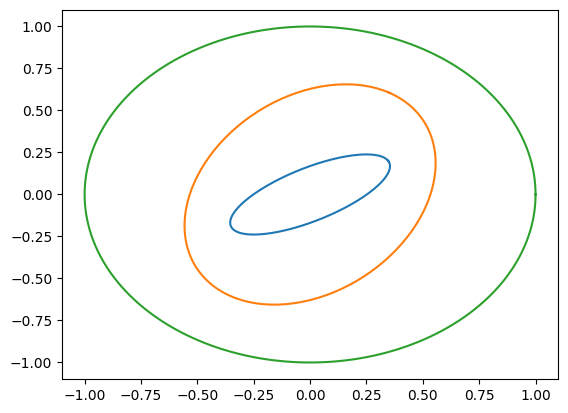

In [27]:
plt.plot(x1,y1)
plt.plot(x2,y2)
plt.plot(x3,y3)

In [28]:
data1 = [[cords, [1, 0, 0]] for cords in zip(x1, y1)]
data2 = [[cords, [0, 1, 0]] for cords in zip(x2, y2)]
data3 = [[cords, [0, 0, 1]] for cords in zip(x3, y3)]
dataset = data1 + data2 + data3

In [29]:
train_X = [x[0] for x in dataset]
train_y = [x[1] for x in dataset]

In [117]:
predictor =  keras.Sequential([
        layers.Dense(100,input_dim=2, activation="tanh", name="tanh"),
        layers.Dense(3,activation='sigmoid', name="sigmoid")
    ]
)
opt = keras.optimizers.Adam(learning_rate=0.01)
predictor.compile(loss='mse', optimizer=opt, metrics=['mae'])

ValueError: All layers added to a Sequential model should have unique names. Name "tanh" is already the name of a layer in this model. Update the `name` argument to pass a unique name.

In [62]:
predictor.fit(train_X, train_y, batch_size=len(dataset)//10, epochs=500, shuffle=True)

NameError: name 'TQDMNotebookCallback' is not defined

In [34]:
pole = [(x,y) for x in np.linspace(-1,1,200) for y in np.linspace(-1,1,200)]

In [38]:
pred = predictor.predict(pole)
z = []
for i in range(200):
    
    z.append(pred[i*200: (i+1)*200])

1250/1250 [==============================] - 1s 746us/step


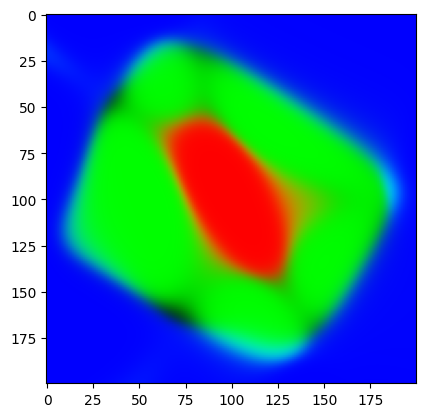

In [39]:
plt.imshow(z)

In [2]:
def func(t):
    return np.cos(2.5*t**2 - 5*t)

In [3]:
h = 0.01
X = np.arange(0, 2.2+h,h)
y = func(X)

In [137]:
predictor =  keras.Sequential([
        layers.Dense(100,input_dim=1, activation="tanh", name="tanh"),
        layers.Dense(30, activation="tanh", name="tanh2"),
        layers.Dense(1,activation='linear', name='linear')
    ]
)
predictor.compile(loss='mse', optimizer='adam', metrics=['mae'])

In [138]:
hist = predictor.fit(X, y, batch_size=10, epochs=1000, verbose=0,shuffle=True)


In [139]:
t = np.linspace(0, 2.2, 2000)
y_ans = func(t)
y_pred = predictor.predict(t)

63/63 [==============================] - 0s 728us/step


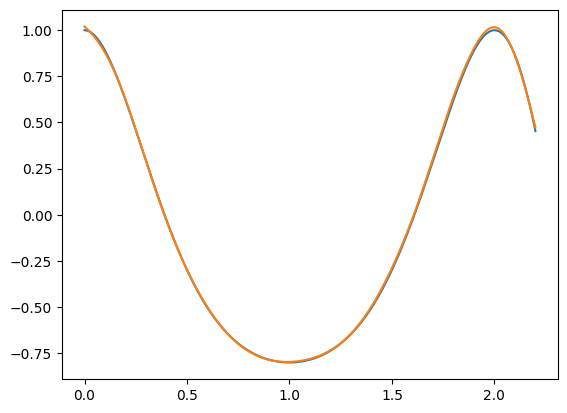

In [140]:
plt.plot(t, y_ans)
plt.plot(t, y_pred)

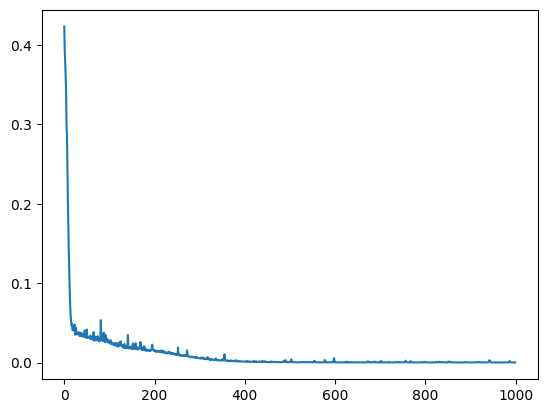

In [143]:
plt.plot(range(1000), hist.history['loss'])

{'loss': [0.00011244393681408837,
  0.00015742429241072387,
  0.0006180326454341412,
  0.0004274587845429778,
  0.0002538589760661125,
  0.0001313523098360747,
  0.00019033456919714808,
  0.00018255942268297076,
  0.002728743012994528,
  0.0009825339075177908,
  0.0006272195023484528,
  0.00025447795633226633,
  0.00016687095921952277,
  0.0001295719703193754,
  0.00010126886627404019,
  0.00015768897719681263,
  0.00046769058099016547,
  0.00019466470985207707,
  0.00031005876371636987,
  0.0006230936851352453,
  0.00037279273965395987,
  0.0005685117794200778,
  0.00032802403438836336,
  0.00028965758974663913,
  0.00014070198812987655,
  0.00022087151592131704,
  0.0024401028640568256,
  0.005378877744078636,
  0.001282598008401692,
  0.003559921635314822,
  0.00023272886755876243,
  0.0002505687007214874,
  0.000205169795663096,
  0.00012986604997422546,
  0.00010890554403886199,
  0.00013881536142434925,
  0.0002844412811100483,
  0.0001052089937729761,
  9.317447984358296e-05,
  